In [1]:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed RuntimeGeneratedFunctions ──────── v0.5.3
   Installed LayoutPointers ─────────────────── v0.1.4
   Installed ConstructionBase ───────────────── v1.3.0
   Installed Libffi_jll ─────────────────────── v3.2.2+1
   Installed NLsolve ────────────────────────── v4.5.1
   Installed BandedMatrices ─────────────────── v0.16.11
   Installed SplittablesBase ────────────────── v0.1.14
   Installed Sundials ───────────────────────── v4.6.0
   Installed CommonSolve ────────────────────── v0.2.0
   Installed DifferentialEquations ──────────── v6.20.0
   Installed Hwloc_jll ──────────────────────── v2.5.0+0
   Installed DynamicPolynomials ─────────────── v0.3.21
   Installed DEDataArrays ───────────────────── v0.2.0
   Installed ZygoteRules ────────────────────── v0.2.2
   Installed Inflate ────────────────────────── v0.1.2
   Installed Random123 ──────────────────────── v1.4.2
   Installed PolyesterW

   Installed DiffEqNoiseProcess ─────────────── v5.9.0
   Installed SIMDTypes ──────────────────────── v0.1.0
   Installed SimpleTraits ───────────────────── v0.9.4
   Installed MuladdMacro ────────────────────── v0.2.2
   Installed StrideArraysCore ───────────────── v0.2.9
   Installed CSTParser ──────────────────────── v3.3.0
   Installed Graphs ─────────────────────────── v1.4.1
    Updating `~/.julia/environments/v1.6/Project.toml`
  [0c46a032] + DifferentialEquations v6.20.0
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [1520ce14] + AbstractTrees v0.3.4
  [dce04be8] + ArgCheck v2.1.0
  [ec485272] + ArnoldiMethod v0.2.0
  [4fba245c] + ArrayInterface v3.1.40
  [4c555306] + ArrayLayouts v0.7.8
  [15f4f7f2] + AutoHashEquals v0.2.0
  [aae01518] + BandedMatrices v0.16.11
  [198e06fe] + BangBang v0.3.32
  [9718e550] + Baselet v0.1.1
  [e2ed5e7c] + Bijections v0.1.3
  [62783981] + BitTwiddlingConvenienceFunctions v0.1.1
  [764a87c0] + BoundaryValueDiffEq v2.7.1
  [fa961155] + 

  ✓ TreeViews
  ✓ ManualMemory
  ✓ CEnum
  ✓ Combinatorics
  ✓ Bijections
  ✓ SIMDTypes
  ✓ CommonSolve
  ✓ ConstructionBase
  ✓ TermInterface
  ✓ InitialValues
  ✓ ArgCheck
  ✓ AutoHashEquals
  ✓ AbstractTrees
  ✓ Tokenize
  ✓ SimpleTraits
  ✓ CommonSubexpressions
  ✓ Referenceables
  ✓ FunctionWrappers
  ✓ Distances
  ✓ RandomNumbers
  ✓ ZygoteRules
  ✓ DimensionalPlotRecipes
  ✓ OpenBLAS_jll
  ✓ Libffi_jll
  ✓ Hwloc_jll
  ✓ IterativeSolvers
  ✓ ResettableStacks
  ✓ DiffResults
  ✓ RuntimeGeneratedFunctions
  ✓ Static
  ✓ DiffRules
  ✓ TimerOutputs
  ✓ ArnoldiMethod
  ✓ ThreadingUtilities
  ✓ SuiteSparse_jll
  ✓ Random123
  ✓ Setfield
  ✓ Wayland_jll
  ✓ Hwloc
  ✓ ArrayLayouts
  ✓ BitTwiddlingConvenienceFunctions
  ✓ Glib_jll
  ✓ MutableArithmetics
  ✓ ArrayInterface
  ✓ SplittablesBase
  ✓ Sundials_jll
  ✓ CSTParser
  ✓ Wayland_protocols_jll
  ✓ CommonMark
  ✓ CPUSummary
  ✓ HostCPUFeatures
  ✓ BangBang
  ✓ EllipsisNotation
  ✓ Cairo_jll
  ✓ ExponentialUtilities
  ✓ MultivariatePoly

In [4]:
using DifferentialEquations
a = 0.98
f(u, p, t) = a * u
u0 = 1.0

tspan = (0.0, 1.0)

prob = ODEProblem(f, u0, tspan)
sol = solve(prob);

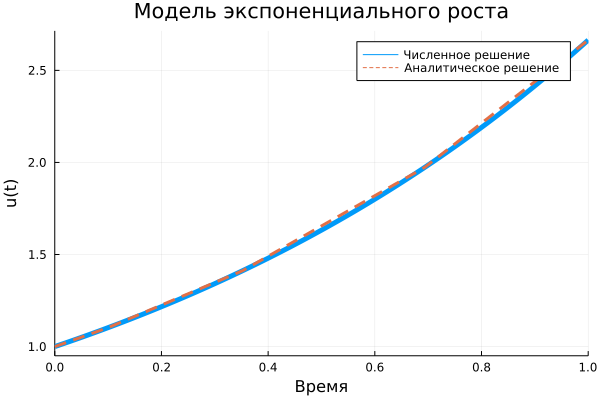

In [8]:
using Plots

plot(sol, linewidth = 5, title = "Модель экспоненциального роста", 
    xaxis = "Время", yaxis = "u(t)", label = "Численное решение")

plot!(sol.t, t->1.0*exp(a*t), lw = 3, ls = :dash, 
    label = "Аналитическое решение")

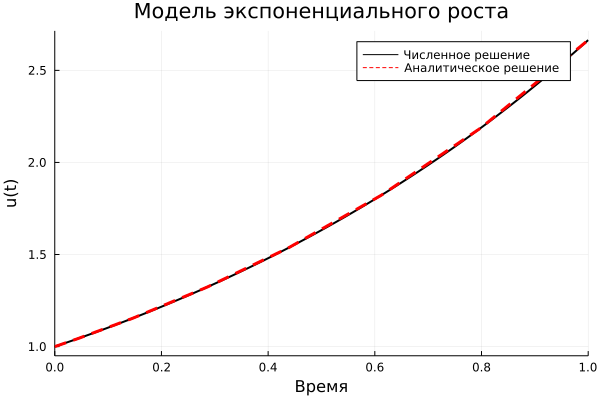

In [10]:
sol = solve(prob, abstol = 1e-8, reltol = 1e-8)

plot(sol, lw = 2, color = "black", 
    title = "Модель экспоненциального роста", xaxis = "Время", 
    yaxis = "u(t)", label = "Численное решение")

plot!(sol.t, t->1.0*exp(a*t), lw = 3, ls = :dash, color = "red",
    label = "Аналитическое решение")

In [11]:
function lorenz!(du, u, p, t)
    σ,ρ,β = p
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end


lorenz! (generic function with 1 method)

In [12]:
u0 = [1.0, 0.0, 0.0]
p = (10, 28, 8/3)
tspan = (0.0, 100.0)

prob = ODEProblem(lorenz!, u0, tspan, p)
sol = solve(prob);

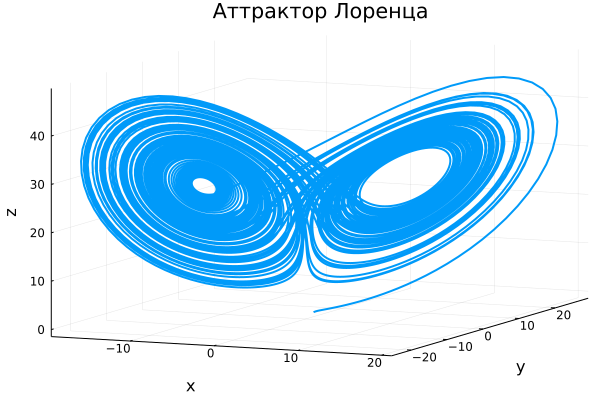

In [13]:
plot(sol, vars = (1, 2, 3), lw = 2, title = "Аттрактор Лоренца",
    xaxis = "x", yaxis = "y", zaxis = "z", legend = false)

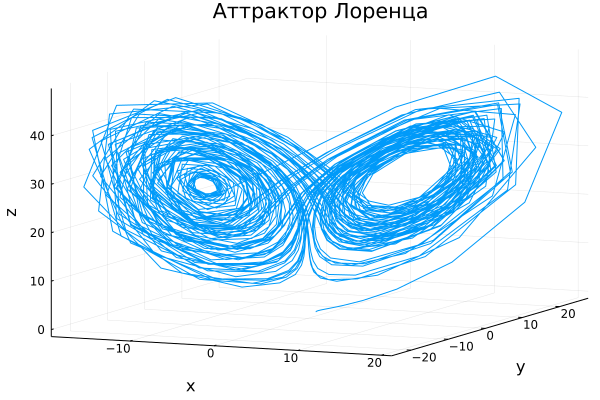

In [14]:
plot(sol, vars = (1, 2, 3), denseplot=false, lw = 1, 
    title = "Аттрактор Лоренца", xaxis = "x", yaxis = "y", zaxis = "z",
    legend = false)

In [16]:
Pkg.add("ParameterizedFunctions")

   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [65888b18] + ParameterizedFunctions v5.12.2
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


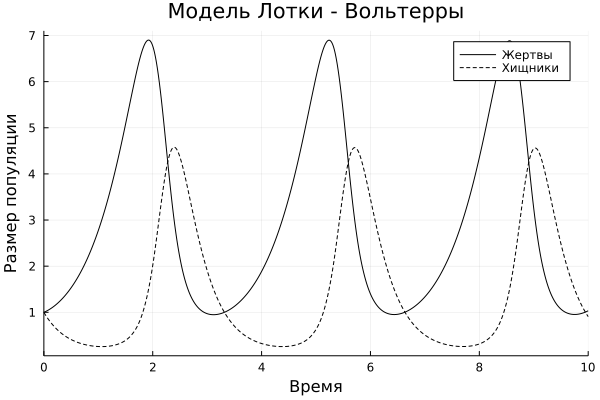

In [21]:
using ParameterizedFunctions

lv! = @ode_def LotkaVolterra begin
    dx = a * x - b * x * y
    dy = -c * y + d * x * y
end a b c d

u0 = [1.0, 1.0]
p = (1.5, 1.0, 3.0, 1.0)
tspan = (0.0, 10.0)

prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)

plot(sol, label = ["Жертвы" "Хищники"], color = "black", 
    ls = [:solid :dash], title = "Модель Лотки - Вольтерры",
    xaxis = "Время", yaxis = "Размер популяции")

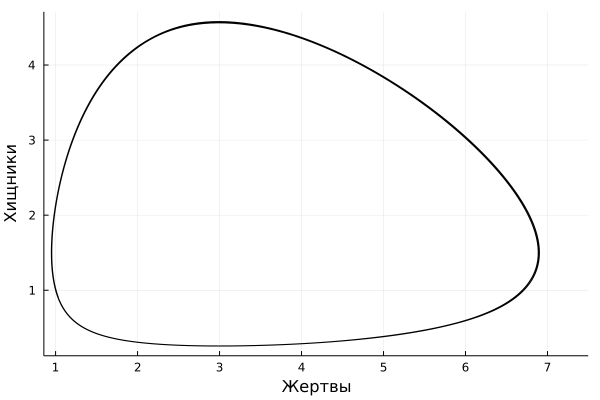

In [22]:
plot(sol, vars = (1,2), color = "black", xaxis = "Жертвы", 
    yaxis = "Хищники", legend = false)

# Задания для самостоятельного выполнения

## 1

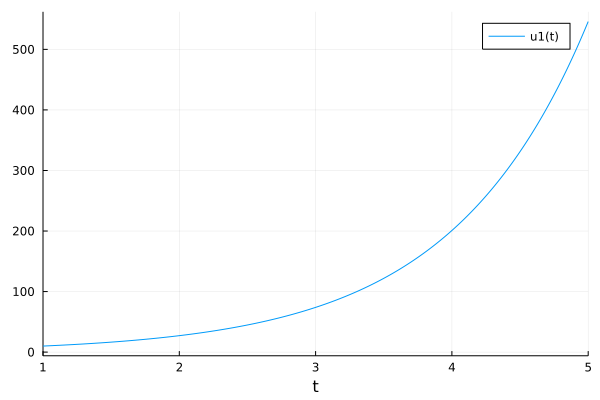

In [31]:
f(u, t) = a * u
u0 = 10
tspan = (1.0, 5.0)

b = 4.0
c = 3.0
a = b - c

prob = ODEProblem(f, u0, tspan)
sol = solve(prob)
plot(sol)

┌ Info: Saved animation to 
│   fn = /Users/sergejloginov/work/2021-2022/julia/lab6/tmp.gif
└ @ Plots /Users/sergejloginov/.julia/packages/Plots/1RWWg/src/animation.jl:114


Plots.AnimatedGif("/Users/sergejloginov/work/2021-2022/julia/lab6/tmp.gif")
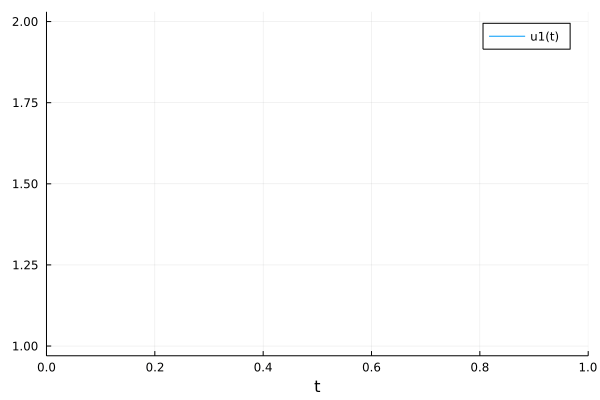

In [44]:
@gif for i in range(0, stop = 5, length = 200)
    prob = ODEProblem(f, u0, i)
    sol = solve(prob)
    plot(sol)
end


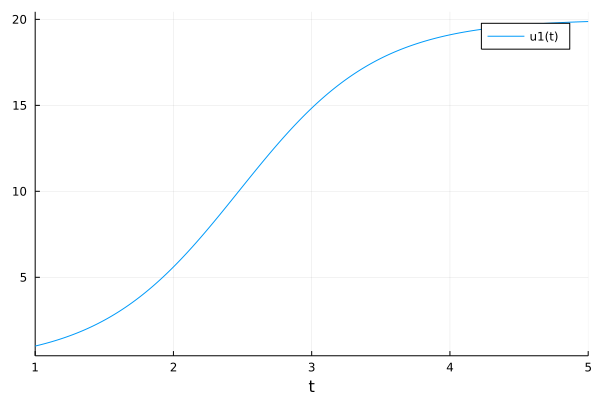

In [43]:
r = 2.0
k = 20.0
log_mod(u, p, t) = r * u * (1 - u / k)
u0 = 1.0
tspan = (1.0, 5.0)

prob = ODEProblem(log_mod, u0, tspan, p)
sol = solve(prob)
plot(sol)

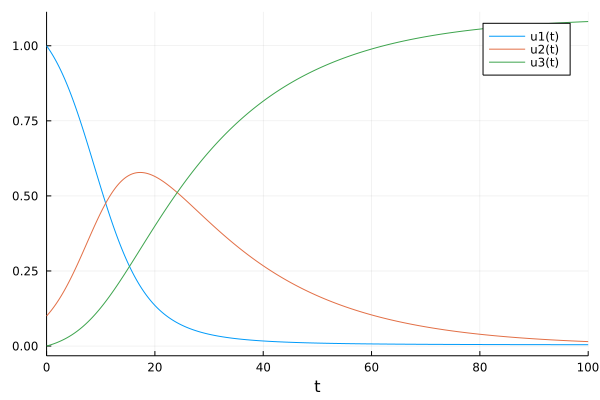

In [59]:
function sir!(du, u, p, t)
    b, v = p
    du[1] = -b * u[2] * u[1]
    du[2] = b * u[2] * u[1] - v * u[2]
    du[3] = v * u[2]
end 

u0 = [1.0, 0.1, 0.0]
tspan = (0.0, 100.0)
p = (0.25, 0.05)

prob = ODEProblem(sir!, u0, tspan, p)
sol = solve(prob)
plot(sol)


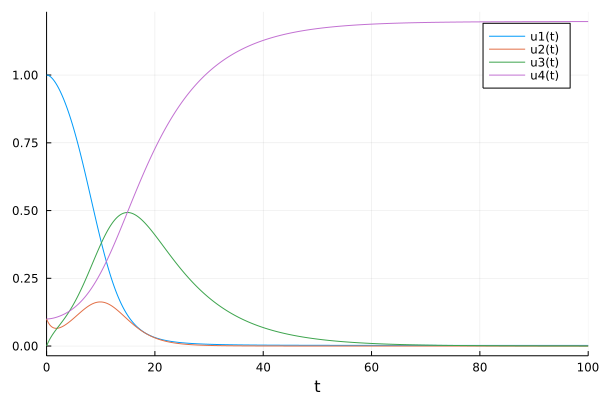

In [79]:
function seir!(du, u, p, t)
    n, b, s, y = p
    du[1] = -b / n * u[1] * u[3]
    du[2] = b / n * u[1] * u[3] - s * u[2]
    du[3] = s * u[2] - y * u[3]
    du[4] = u[3] * y
end

u0 = [1.0, 0.1, 0.0, 0.1]
p = (1, 0.55, 0.5, 0.1)
tspan = (0.0, 100.0)

prob = ODEProblem(seir!, u0, tspan, p)
sol = solve(prob)
plot(sol)

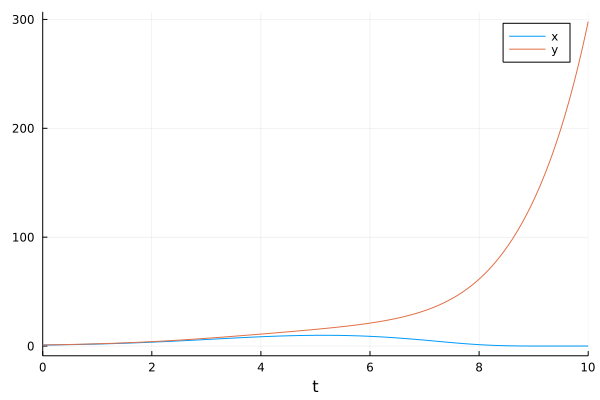

In [88]:
conc! = @ode_def Conc begin
    dx = a * x - b * x * y
    dy = a * y - b * x * y
end a b

u0 = [0.9, 1.0]
p = (0.8, 0.05)
tspan = (0.0, 10.0)

prob = ODEProblem(conc!, u0, tspan, p)
sol = solve(prob)
plot(sol)

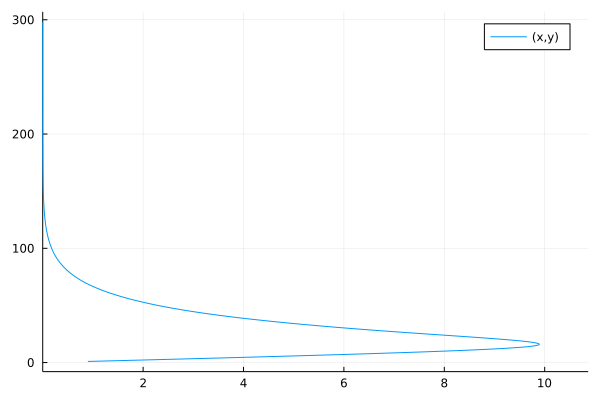

In [89]:
plot(sol, vars = (1, 2))

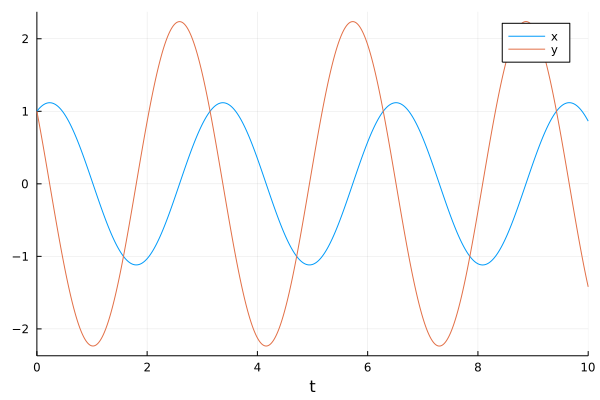

In [97]:
garm_osc! = @ode_def GarmonicOscil begin
    dx = y
    dy = -(w^2) * x
end w

u0 = [1.0, 1.0]
p = (2)
tspan = (0.0, 10.0)

prob = ODEProblem(garm_osc!, u0, tspan, p)
sol = solve(prob)
plot(sol)

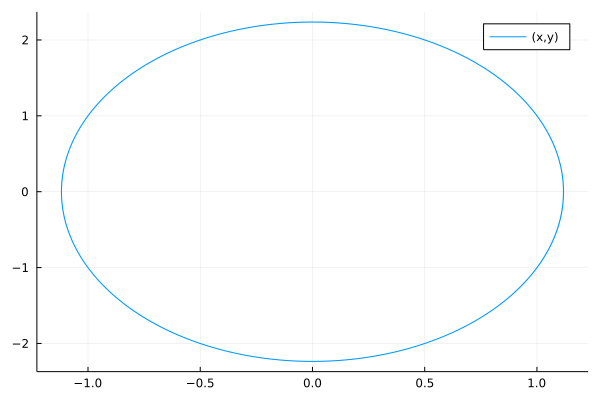

In [98]:
plot(sol, vars = (1,2))

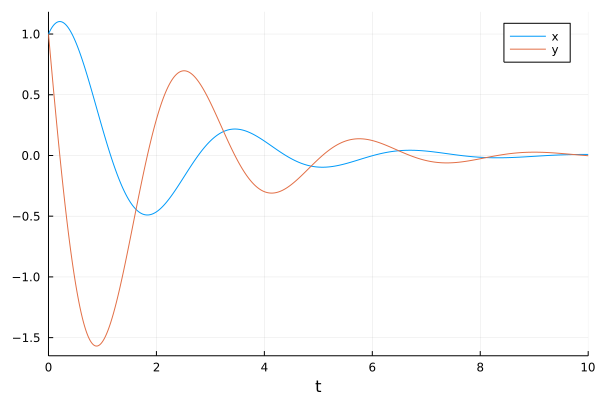

In [101]:
free_garm_osc! = @ode_def FGarm_osc begin
    dx = y
    dy = - 2 * g * y - w^2 * x
end g w

u0 = [1.0, 1.0]
p = (0.5, 2.0)
tspan = (0.0, 10.0)

prob = ODEProblem(free_garm_osc!, u0, tspan, p)
sol = solve(prob)
plot(sol)
    

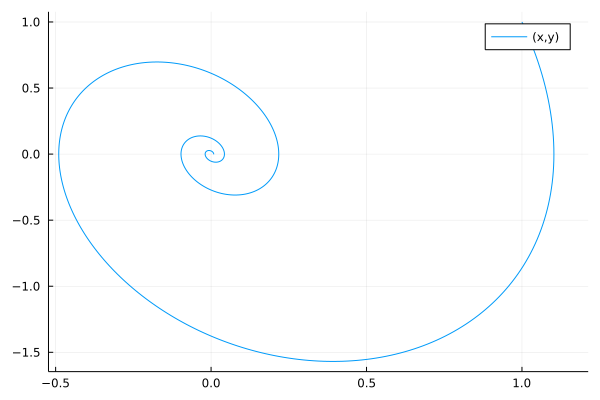

In [102]:
plot(sol, vars = (1, 2))